## Regression

In [81]:
%%capture

%run './lib/init.ipynb'
from lib import utilities as util
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [82]:
trainDf  = util.load_df('trainDf')
studyVars = [
  'student_duration_mins',
  'timeliness_duration_mins',
  'item_attempt_duration_mins',
  'item_type_code_name_swoe',
  'number_of_distinct_instance_items'
]

###### Create regression dataframe
 - completed items
 - study variables
  - target
  - student_duration_mins
  - timeliness_duration_mins
  - item_attempt_duration_mins
  - item_type_code_name_swoe
  - number_of_distinct_instance_items

In [83]:
df = trainDf.select('target',*studyVars).toPandas()

###### Dataframe structure

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47221 entries, 0 to 47220
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   target                             47221 non-null  int32  
 1   student_duration_mins              47221 non-null  float64
 2   timeliness_duration_mins           47221 non-null  float64
 3   item_attempt_duration_mins         47221 non-null  float64
 4   item_type_code_name_swoe           47221 non-null  float64
 5   number_of_distinct_instance_items  47221 non-null  int32  
dtypes: float64(4), int32(2)
memory usage: 1.8 MB


###### Target variable barplot

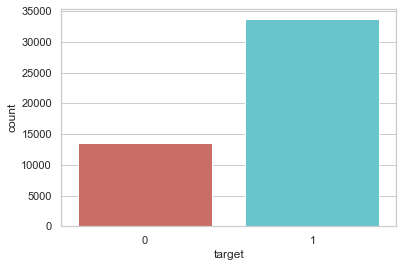

In [85]:
sns.countplot(x='target',data=df, palette='hls')
plt.show()

###### Target variable percentages

In [86]:
count_no_pass = len(df[df['target'] == 0])
count_pass = len(df[df['target'] == 1])
pct_of_no_pass = count_no_pass / (count_no_pass+count_pass)
print("percentage of no pass is", round(pct_of_no_pass * 100), '%')
pct_of_pass = count_pass/(count_no_pass + count_pass)
print("percentage of passes", round(pct_of_pass * 100), '%')

percentage of no pass is 29 %
percentage of passes 71 %


###### Number of missing values

In [87]:
df.isnull().sum()

target                               0
student_duration_mins                0
timeliness_duration_mins             0
item_attempt_duration_mins           0
item_type_code_name_swoe             0
number_of_distinct_instance_items    0
dtype: int64

###### Number of distinct instance items histogram

Text(0, 0.5, 'Frequency')

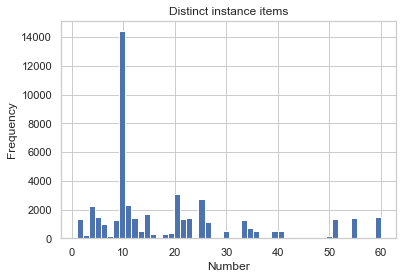

In [88]:
df.number_of_distinct_instance_items.hist(bins=50)
plt.title('Distinct instance items')
plt.xlabel('Number')
plt.ylabel('Frequency')

###### Target vs number of distinct instance items scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


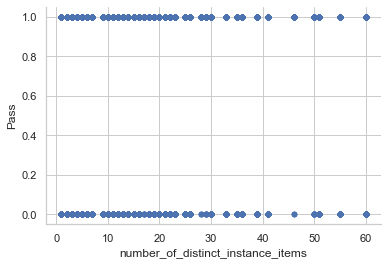

In [89]:
df.plot.scatter('number_of_distinct_instance_items', 'target')
plt.ylabel('Pass')
sns.despine()

###### Item type code name swoe histogram

Text(0, 0.5, 'Frequency')

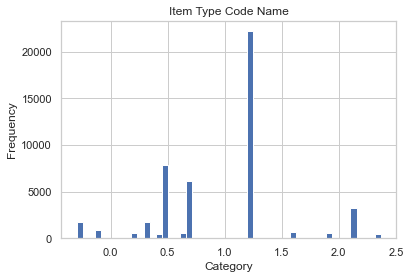

In [90]:
df.item_type_code_name_swoe.hist(bins=50)
plt.title('Item Type Code Name')
plt.xlabel('Category')
plt.ylabel('Frequency')


###### Target vs item type code name scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


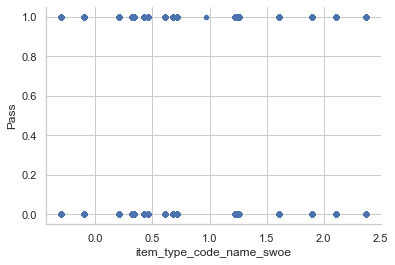

In [91]:
df.plot.scatter('item_type_code_name_swoe', 'target')
plt.ylabel('Pass')
sns.despine()

###### Attempt duration minutes histogram

Text(0, 0.5, 'Frequency')

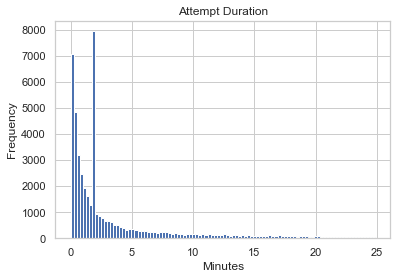

In [92]:
df.item_attempt_duration_mins.hist(bins=100)
plt.title('Attempt Duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')


###### Target vs Attempt duration minutes scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


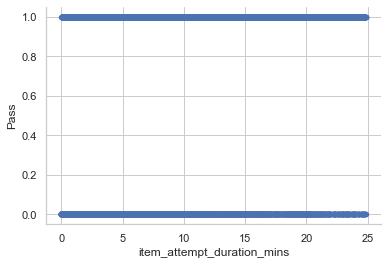

In [93]:
df.plot.scatter('item_attempt_duration_mins', 'target')
plt.ylabel('Pass')
sns.despine()

###### Student duration minutes histogram

Text(0, 0.5, 'Frequency')

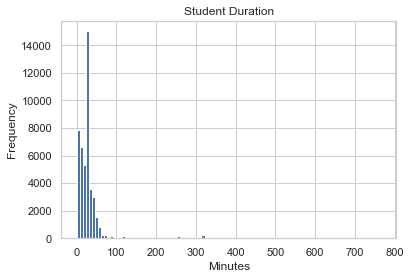

In [94]:
df.student_duration_mins.hist(bins=100)
plt.title('Student Duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')


###### Target vs Student duration minutes scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


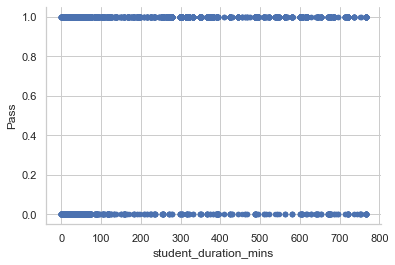

In [95]:
df.plot.scatter('student_duration_mins', 'target')
plt.ylabel('Pass')
sns.despine()


###### Timeliness duration minutes histogram

Text(0, 0.5, 'Frequency')

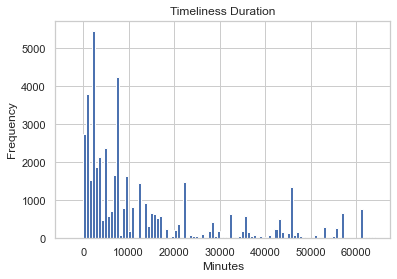

In [96]:
df.timeliness_duration_mins.hist(bins=100)
plt.title('Timeliness Duration')
plt.xlabel('Minutes')
plt.ylabel('Frequency')


###### Target vs Timeliness duration minutes scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


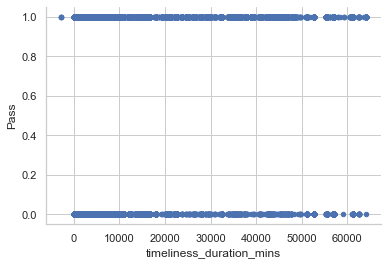

In [97]:
df.plot.scatter('timeliness_duration_mins', 'target')
plt.ylabel('Pass')
sns.despine()

###### Check the independence between the independent variables

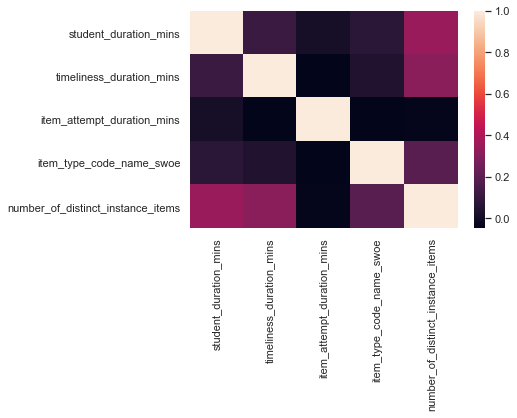

In [98]:
sns.heatmap( df[df.columns.intersection(studyVars)].corr())
plt.show()

Correlation less than .5

###### Create dependent and independent variable arrays

In [99]:
# Create arrays for the features and the response variable
y_train = df['target'].values
X_train = df.drop('target', axis=1).values

##### Dimension reduction PCA

In [107]:
# Ref: https://people.duke.edu/~ccc14/sta-663-2017/09_Machine_Learning.html

from sklearn.decomposition import PCA
pca = PCA()
data_scaled_pca = pd.DataFrame(pca.fit_transform(df), columns=df.columns)

v = pca.explained_variance_ratio_
vc = v.cumsum()
pd.DataFrame(list(zip(it.count(), v, vc)), columns=['pc', 'explained', 'cumsum']).head(10)

TypeError: zip argument #1 must support iteration

###### Regression

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

- Note: The model converged if there's no convergence warning

###### Disply LogisticRegression Parameters

In [109]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

###### Regression coeficients

In [122]:
coef = logreg.coef_[0].tolist()
coef

[0.0007663454614583724,
 5.335240198215164e-07,
 -0.012047296257153436,
 0.6812954463845317,
 0.003920362698410351]

###### Regression intercept

In [120]:
intercept = logreg.intercept_[0]
intercept

0.2785180984050382

###### Regression classes

In [112]:
logreg.classes_

array([0, 1], dtype=int32)

###### Formula

In [123]:
params = ['intercept'] + studyVars
estimate = [intercept] + coef
paramsDf = pd.DataFrame({'param': params,
        'estimate': estimate,
        })
paramsDf

,param,estimate
0,intercept,2.785181e-01
1,student_duration_mins,7.663455e-04
2,timeliness_duration_mins,5.335240e-07
3,item_attempt_duration_mins,-1.204730e-02
4,item_type_code_name_swoe,6.812954e-01
5,number_of_distinct_instance_items,3.920363e-03


- at least one of the regression coefficients for a predictor variable is significantly different from 0.

###### R2

In [102]:
print('Train R2: {:.2f}'.format(logreg.score(X_train, y_train)))

Train R2: 0.71


###### Measure accuracy

In [ ]:
y_pred = logreg.predict(X_train)


#### Scores

1) Accuracy: fraction of correct classification https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [103]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)


0.7133478748861736

2) Precision: when it predicts yes (legendary), how often is the prediction correct? https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [104]:
from sklearn.metrics import precision_score

precision_score(y_train, y_pred)

0.7138155100654039

3) Recall: when actually yes (legendary), how often is the prediction correct? https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html


In [106]:
from sklearn.metrics import recall_score

recall_score(y_train, y_pred)

0.9982479063966265

###### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

###### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

###### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
